# Checking if modified CAMB is functional and providing correct results

In [1]:
import camb
import matplotlib.pyplot as plt
import numpy as np

# loading Planck 2018 Parameters

In [2]:
lcdm_params = camb.read_ini("inifiles/planck_2018.ini")
lcdm_results = camb.get_results(lcdm_params)
lcdm_powers = lcdm_results.get_cmb_power_spectra(lcdm_params, CMB_unit="muK")
lcdm_Cl = lcdm_powers["total"]
l = np.arange(lcdm_Cl.shape[0])
lcdmTT = lcdm_Cl[:, 0]
print(lcdm_params)

class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_both
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 1.3464234
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2700
 max_l_tensor = 600
 max_eta_k = 18000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0223828
 omch2 = 0.1201075
 omk = 0.0
 omnuh2 = 0.0006451439
 H0 = 67.32117
 TCMB = 2.7255
 YHe = 0.2454006
 num_nu_massless = 2.046
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = True
 nu_mass_degeneracies = [0.0]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_indeptilt
   ns = 0.9660499
   nrun = 0.0
   nrunrun = 0.0
 

## General $\beta$ parameterisation

## logarithmic ($\beta = 0$)

In [ ]:
log_beta = lcdm_params
log_beta.set_dark_energy(w=-0.8, wa=-1.1, beta_DE=0, dark_energy_model="ppf")
log_results = camb.get_results(log_beta)
log_powers = log_results.get_cmb_power_spectra(log_beta, CMB_unit="muK")
log_Cl = log_powers["total"]
logTT = log_Cl[:, 0]

## CPL ($\beta = 1$)

In [4]:
cpl_beta = lcdm_params
cpl_beta.set_dark_energy(w=-0.8, wa=-1.1, beta_DE=1, dark_energy_model="ppf")
cpl_results = camb.get_results(cpl_beta)
cpl_powers = cpl_results.get_cmb_power_spectra(cpl_beta, CMB_unit="muK")
cpl_Cl = cpl_powers["total"]
cplTT = cpl_Cl[:, 0]

## Best fit $\beta$

In [6]:
fit_beta = lcdm_params
fit_beta.set_dark_energy(w=-0.8, wa=-1.1, beta_DE=3, dark_energy_model="ppf")
fit_results = camb.get_results(fit_beta)
fit_powers = fit_results.get_cmb_power_spectra(fit_beta, CMB_unit="muK")
fit_Cl = fit_powers["total"]
fitTT = fit_Cl[:, 0]

# TT power spectrum

(2, 2600)

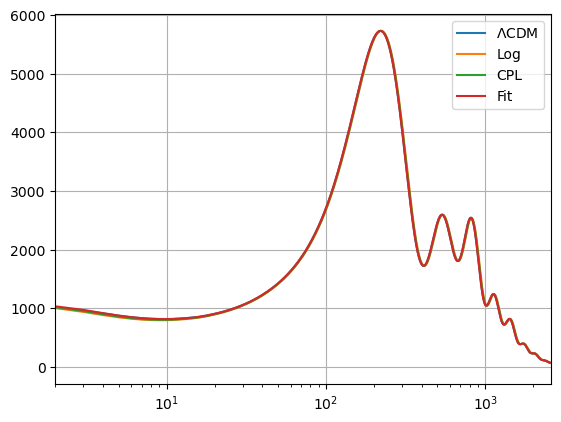

In [11]:
plt.plot(l, lcdmTT, label="$\Lambda$CDM")
plt.plot(l, logTT, label="Log")
plt.plot(l, cplTT, label="CPL")
plt.plot(l, fitTT, label="Fit")
plt.legend()
plt.xscale("log")
plt.grid()
plt.xlim(2, max(l))

Text(0, 0.5, '$(C_{\\ell\\beta}^{TT} - C_{\\ell\\Lambda CDM}^{TT})/C_{\\ell\\Lambda CDM}^{TT}$')

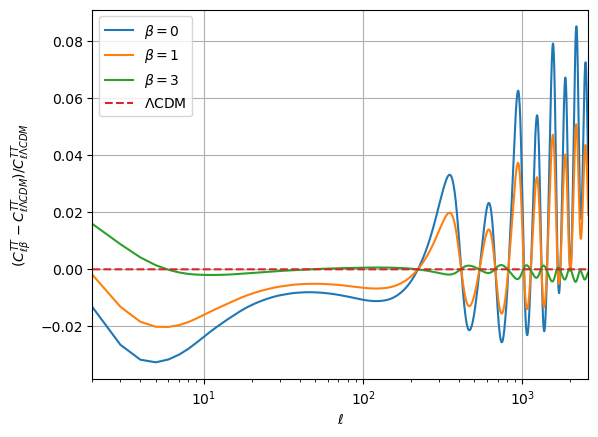

In [20]:
dcl_log = (logTT[2:] - lcdmTT[2:]) / lcdmTT[2:]
dcl_cpl = (cplTT[2:] - lcdmTT[2:]) / lcdmTT[2:]
dcl_fit = (fitTT[2:] - lcdmTT[2:]) / lcdmTT[2:]

plt.plot(l[2:], dcl_log, label="$\\beta = 0$")
plt.plot(l[2:], dcl_cpl, label="$\\beta = 1$")
plt.plot(l[2:], dcl_fit, label="$\\beta = 3$")
plt.plot(l[2:], np.zeros(len(l[2:])), linestyle="dashed", label="$\Lambda$CDM")

plt.legend()
plt.xscale("log")
plt.xlim(2, max(l))
plt.grid()
plt.xlabel("$\ell$")
plt.ylabel(
    "$(C_{\ell\\beta}^{TT} - C_{\ell\Lambda CDM}^{TT})/C_{\ell\Lambda CDM}^{TT}$"
)